<a href="https://colab.research.google.com/github/Scjatto/PyCollab/blob/main/Sonifiication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Basic Libraries**

In [ ]:
import os
import pandas as pd
import matplotlib.pylab as plt
import math
import numpy as np


# **Getting Data from personal Drive Folder**




*   DataSet path taken from personal Drive
*   Drive mounted to this notebook to access drive folders
*   Source of data will be different in different systems





In [ ]:
current_working_dir = os.getcwd()
# $(PWD)/drive/MyDrive/DataSets/Sonification
data_set_folder_name = os.path.join("drive", "MyDrive", "DataSets", "Sonification")
data_set_file_name = "lunarCraterAges.csv"
data_set_path = os.path.join(current_working_dir, data_set_folder_name, data_set_file_name) # Path of csv data file

In [ ]:
df = pd.read_csv(data_set_path)  #load data as a pandas dataframe
df.head(5) #take a look at first 5 rows

,names,longitude,latitude,diameter,age
0,Copernicus,339.92969,9.63280,96.7,797
1,Tycho,348.71469,-43.25890,85.7,85
2,King,120.49220,4.93750,76.2,992
3,Jackson,196.68950,22.04000,71.4,147
4,Ohm,246.27397,18.28491,64.3,291


# Plot the data, crater age vs crater diameter

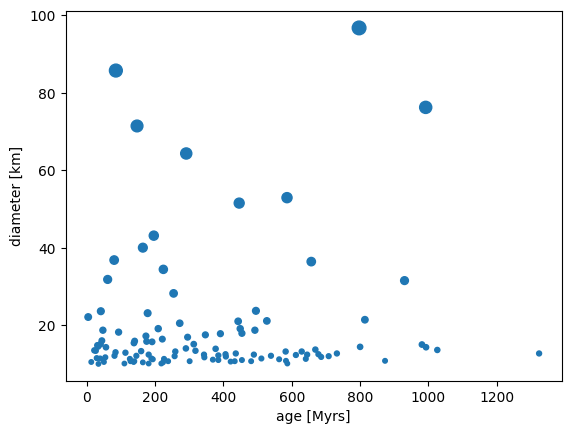

In [ ]:
ages = df['age'].values   #get age values in an array
diameters = df['diameter'].values  #get diameter values in an array
plt.scatter(ages, diameters, s=diameters)
plt.xlabel('age [Myrs]')
plt.ylabel('diameter [km]')
plt.show()

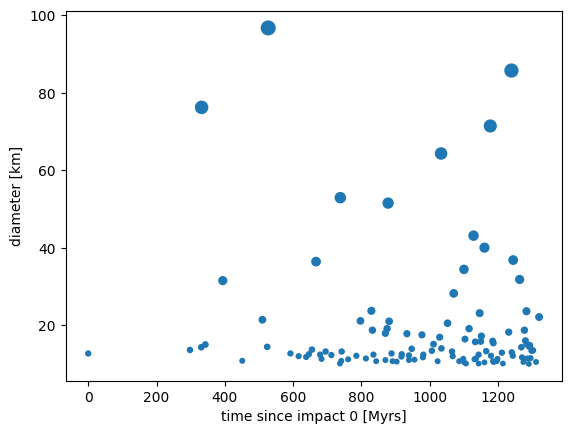

In [ ]:
# Shift Reference point, start Age from 0
# Largest Age will become 0 (Time starting from 0), considering the origin of first impact

times_myrs = max(ages) - ages  #measure time from 1st impact in data
plt.scatter(times_myrs, diameters, s=diameters)
plt.xlabel('time since impact 0 [Myrs]')
plt.ylabel('diameter [km]')
plt.show()

# Convert cratater params into musical params

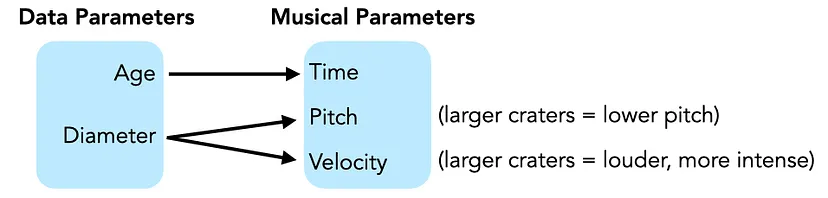

**Crater ages will be mapped to time in the obvious way (happening forwards in time). Crater diameters will be mapped to musical pitch, with larger craters being lower pitched notes. You can make the opposite choice but I feel that this choice is more intuitive since larger objects/instruments can support lower notes. We will also use the crater diameters to control the note velocity (a combination of volume and intensity), with larger craters producing louder and more intense sounds (seems to make sense!). Try to identify the range, scaling, and quantization choices that are made as we implement the sonification design.**

**Mapping**
Mapping a set of numbers from one range to another is so common in sonification we might as well write a function that does just that for us. The following function will map input values (as an integer, float, or array) taken from one range, min_value to max_value, into a new range, min_result to max_result:

In [ ]:
def map_value(value, min_value, max_value, min_result, max_result, round_off_req=False):
    '''maps value (or array of values) from one range to another'''

    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    if not round_off_req:
        return result

    int_res = int (result)

    if (result < (int_res + 0.5)) :
        return math.floor(result)
    else :
        return math.ceil(result)

# Scale Factoring for normalizing data for musical beats

* Indication of certain beat for representing an interval of time
* Here 25 million years = 1 beat
* Max number of beats = 52.8 beats (52.8 * 25 Million Years)

In [ ]:
myrs_per_beat = 25  #conversion factor: Myrs for each beat of music
t_data = times_myrs/myrs_per_beat #compress impact times from Myrs to beats
print(max(t_data))

52.8


# Change data range from million year rage to Beat range

* Set duration using max of rhe data taken from the scale factor
* The max == 52.8, therefore the duration of the music going to be the same

In [ ]:
duration_beats = max(t_data) #desired duration in beats (actually, onset of last note, i.e. max of the t_data)
num_data_points = times_myrs.size

beats_data = np.zeros(num_data_points)
for idx in range (num_data_points):
    beats_data[idx] = map_value(times_myrs[idx], 0, max(times_myrs), 0,duration_beats, True)

print(beats_data)

[21. 50. 13. 47. 41. 30. 35. 45. 46. 50. 27. 44. 51. 16. 43. 33. 51. 46.
 53. 20. 32. 35. 42. 35. 45. 33. 51. 49. 35. 37. 39. 46. 41. 44. 51. 47.
 46. 45. 47. 40. 51. 14. 52. 52. 21. 13. 51. 41. 38. 26. 12. 52. 40. 52.
 47. 28. 30. 43. 50. 48.  0. 24. 36. 26. 37. 27. 33. 39. 46. 28. 38. 31.
 47. 50. 25. 43. 37. 26. 39. 51. 52. 33. 45. 51. 27. 44. 48. 30. 45. 38.
 35. 38. 18. 30. 34. 36. 41. 43. 47. 48. 36. 47. 51. 52. 44. 46. 29. 44.
 46. 49. 52.]


# Setting Tempo
* Setting 60 beats per minute
* Can be changed depending on the output music
* Higher the param, faster the beats, smaller is the duration, and vice versa

In [ ]:
bpm = 60  #beats per minute, if bpm = 60, 1 beat = 1 sec
duration_sec = duration_beats*60/bpm #duration in seconds
print('Duration:', duration_sec, 'seconds')

Duration: 52.8 seconds


# Normalize data for Pitches
* Diameter of the craters are considered for pitch setting
* Noramlization is required for pitch scaling range
* Pitch range is going to be mapped againt 0 to 1

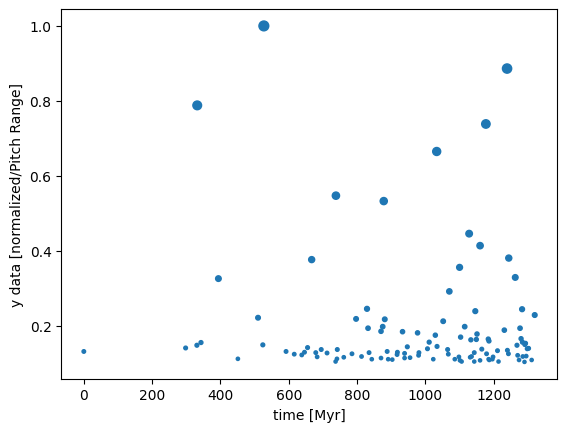

In [ ]:
pitch_data = np.zeros(num_data_points)
for idx in range (num_data_points):
    pitch_data[idx] = map_value(diameters[idx], 0, max(diameters), 0,1)

plt.scatter(times_myrs, pitch_data, s=50*pitch_data)
plt.xlabel('time [Myr]')
plt.ylabel('y data [normalized/Pitch Range]')
plt.show()

We can see that the many small craters are bunched up at the bottom. If we map this data to a limited set of musical pitches, many of those will be mapped to the same note.

This can be seen in the below graph in which we use the roundoff range tranfer

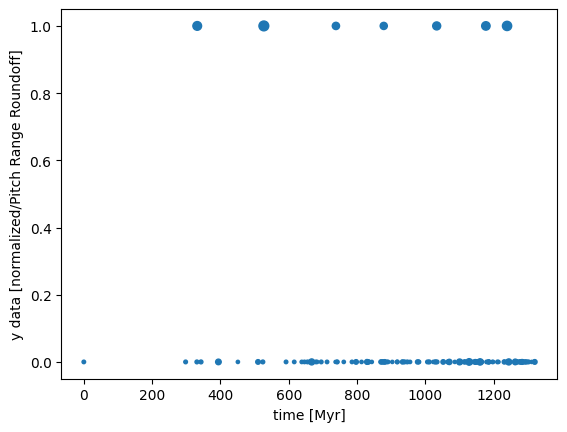

In [ ]:
pitch_data_round = np.zeros(num_data_points)
for idx in range (num_data_points):
    pitch_data_round[idx] = map_value(diameters[idx], 0, max(diameters), 0,1, True)

plt.scatter(times_myrs, pitch_data_round, s=50*pitch_data)
plt.xlabel('time [Myr]')
plt.ylabel('y data [normalized/Pitch Range Roundoff]')
plt.show()

Maybe you want that (to communicate that most are of similar, small size) but we’re going to do something different. We want to be able to hear the difference in crater size even for the small craters so we’ll use an extra degree of freedom and use a non-linear scaling. Raising all normalized data values to the power of 0.5 (a square root) helps spread out the smaller craters, making it easier to hear their different sizes.

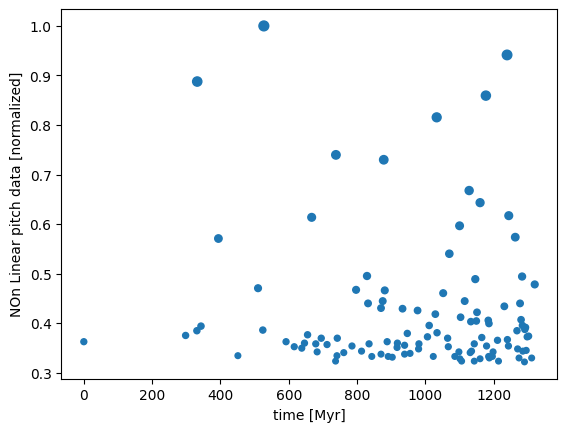

In [ ]:
y_scale = 0.5  #lower than 1 to spread out more evenly
pitch_data_non_linear = pitch_data**y_scale
plt.scatter(times_myrs, pitch_data_non_linear, s=50*pitch_data_non_linear)
plt.xlabel('time [Myr]')
plt.ylabel('NOn Linear pitch data [normalized]')
plt.show()

# Introduction to Music Libraries

* Audiolazy: https://pypi.org/project/audiolazy/
* This library will be used to convert data points to MIDI points (Musical Instrument Digital Interface)

In [ ]:
!pip3 install audiolazy
# !pip install collections.abc

* If Error in import occurs then
        * Go to the files mentioned in error message, eg. /usr/local/lib/python3.10/dist-packages/audiolazy/<filename>.py in <module>
        * Change the import of collections to collections.abc
        * Python 3.10 has sent some libraries form collections to collections.abc



In [ ]:
from audiolazy import str2midi, midi2str

In [ ]:
print(str2midi('C3'))
print(midi2str(63))

48
D#4


# Choosing Note Set
* Note set determines the Octave set upto a few sets as to how the music scheme will sound like
* As the name mentions, we are going to initialize the note set with N Octaves having 8 notes per octave
* C major scale:

```
note_names = ['C2','D2','E2','F2','G2','A2','B2',
             'C3','D3','E3','F3','G3','A3','B3',
             'C4','D4','E4','F4','G4','A4','B4']
```
* In some sonifications, you might want to play it safer and use a pentatonic scale. Here’s 3 octaves of C major pentatonic
```
note_names = ['C2','D2','E2','G2','A2',
             'C3','D3','E3','G3','A3',
             'C4','D4','E4','G4','A4']
```
* This note set selection can also be considered as a hyperparameter
* We will currently be using the note name for Cmaj13#11 chord, which has notes from the C lydian scale, chosen for aesthetic and artistic reasons. There will only be one melodic musical part so a large range will not conflict with other instruments with overlapping ranges.


In [ ]:
note_names = ['C1','C2','G2',
             'C3','E3','G3','A3','B3',
             'D4','E4','G4','A4','B4',
             'D5','E5','G5','A5','B5',
             'D6','E6','F#6','G6','A6'] # Cmaj13#11 chord

Once we’ve chosen our note set, we make a list of the corresponding midi note numbers. We will also define a variable n_notes to store the number of notes we will map data to.

In [ ]:
note_midis = [str2midi(n) for n in note_names]
n_notes = len(note_midis)
print (note_midis, n_notes)

[24, 36, 43, 48, 52, 55, 57, 59, 62, 64, 67, 69, 71, 74, 76, 79, 81, 83, 86, 88, 90, 91, 93] 23


# Change pitch data range to midi data range

* Using the map_function, we would change the pitch data into MIDI data by rouding off the final values
* round off req == true

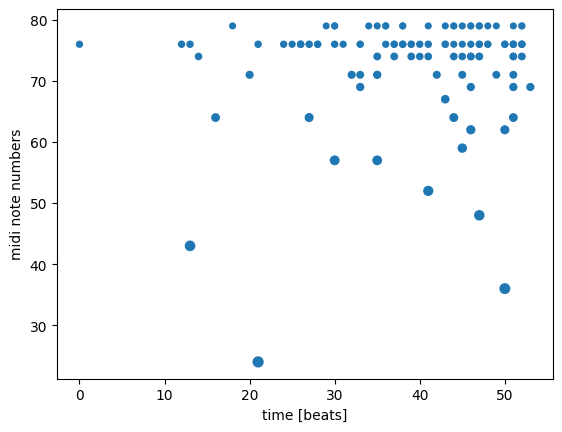

In [ ]:
midi_data = []
for i in range(len(pitch_data_non_linear)):
    note_index = map_value(pitch_data_non_linear[i], 0, 1, (n_notes-1), 0, True)
    midi_data.append(note_midis[note_index])
plt.scatter(beats_data, midi_data, s=50*pitch_data_non_linear)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

# Mapping Data To Velocity


For each MIDI note we can also specify the note’s velocity as an integer from 0–127. 0 will be faint and soft and 127 will be loud and intense. To keep the smallest craters still clearly audible we’ll limit the velocity to the range 35–127. Then, we can use the map_value function as long as we remember to round the result. The plot is the same as the previous plot except that the note velocities now control the dot size.

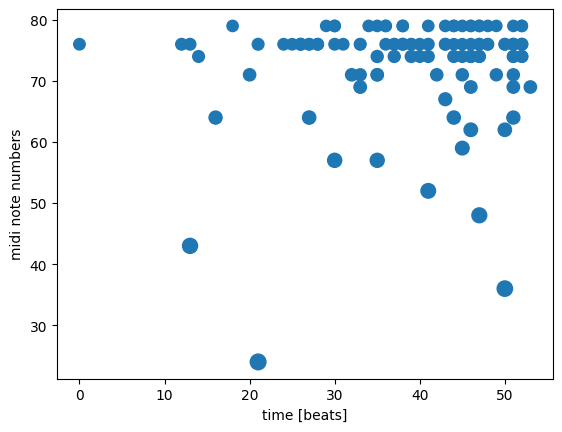

In [ ]:
vel_min,vel_max = 35,127   #minimum and maximum note velocity
vel_data = []
for i in range(len(pitch_data_non_linear)):
    note_velocity = round(map_value(pitch_data_non_linear[i],0,1,vel_min, vel_max))
    vel_data.append(note_velocity)

plt.scatter(beats_data, midi_data, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

# Writing a MIDI File
All that’s left to do here is save the data into a MIDI file. The midiutil library makes this easy. You need to create a new MIDIFile object, set the tempo, and then add the notes one at a time. For each note you can specify the track, channel, time (measured in beats), pitch (midi note number), volume (velocity), and duration (measured in beats). We’ll just set all of the note durations to 2 beats but you could use data to control this too. For more complex projects you can also write notes on different tracks or midi channels. Then you need to create and write the data to a MIDI file which will have the extension .mid. It will appear in the same folder in which you’re running the python script or notebook.

In [ ]:
!pip3 install midiutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54570 sha256=438c83df75cd8c4c03d270c9ae6f4b043bfef592bf8cf1b552929efc0d94b825
  Stored in directory: /root/.cache/pip/wheels/af/43/4a/00b5e4f2fe5e2cd6e92b461995a3a97a2cebb30ab5783501b0
Successfully built midiutil


In [ ]:
from midiutil import MIDIFile

#create midi file object, add tempo
my_midi_file = MIDIFile(1) #one track
my_midi_file.addTempo(track=0, time=0, tempo=bpm)
#add midi notes
for i in range(len(beats_data)):
    my_midi_file.addNote(track=0, channel=0, time=beats_data[i], pitch=midi_data[i], volume=vel_data[i], duration=2)
#create and save the midi file itself
midi_output_folder_name = os.path.join("SonoMIDI", "MoonCrater")
midi_output_file_name = "Track_1.mid"
midi_output_path = os.path.join(current_working_dir, midi_output_folder_name, midi_output_file_name) # Path of csv data file


with open(midi_output_path, "wb") as f:
    my_midi_file.writeFile(f)